In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [35]:
train = pd.read_csv('observations_train.csv')

In [36]:
train.head(5)

,series_id,date,value
0,AAA10Y,01-03-2000 00:00,1.17
1,AAA10Y,01-04-2000 00:00,1.20
2,AAA10Y,01-05-2000 00:00,1.16
3,AAA10Y,01-06-2000 00:00,1.15
4,AAA10Y,01-07-2000 00:00,1.17


In [37]:
 sp = train[train['series_id']=='SP500']

In [38]:
sp.head()

,series_id,date,value
84020,SP500,02-14-2011 00:00:00,1332.32
84021,SP500,02-15-2011 00:00:00,1328.01
84022,SP500,02-16-2011 00:00:00,1336.32
84023,SP500,02-17-2011 00:00:00,1340.43
84024,SP500,02-18-2011 00:00:00,1343.01


In [39]:
sp['date']= pd.to_datetime(sp['date'])
sp['date']

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


84020   2011-02-14
84021   2011-02-15
84022   2011-02-16
84023   2011-02-17
84024   2011-02-18
           ...    
85810   2017-12-25
85811   2017-12-26
85812   2017-12-27
85813   2017-12-28
85814   2017-12-29
Name: date, Length: 1795, dtype: datetime64[ns]

In [40]:
len(sp[sp['value'].isna()])/len (sp)

0.0350974930362117

In [41]:
sp['value']=sp['value'].fillna(method = 'ffill')

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
stock_value= sp['value'].values
stock_value

array([1332.32, 1328.01, 1336.32, ..., 2682.62, 2687.54, 2673.61])

In [10]:
day = sp['date']
date = pd.to_datetime(sp['date'].iloc[-1])-pd.to_datetime(sp['date'].iloc[0])
d = date.days

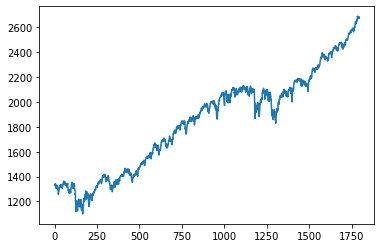

In [11]:
plt.plot(stock_value)

In [12]:
x_hat = np.fft.fft(stock_value, norm="ortho")

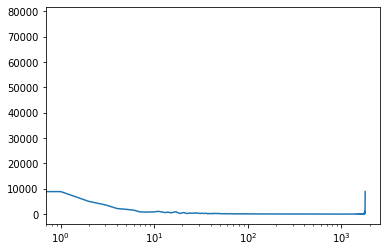

In [13]:
plt.xscale("log")
plt.plot(np.abs(x_hat))

In [14]:
k_0 = 6
x_hat_filtered = x_hat
x_hat_filtered[k_0:len(stock_value)-k_0] = 0

In [15]:
x_hat_filtered

array([77999.72961234-1.22923893e-12j,  -797.54575358+8.84513415e+03j,
        2164.58646153+4.52376485e+03j, ...,
         371.57465598-3.62006500e+03j,  2164.58646153-4.52376485e+03j,
        -797.54575358-8.84513415e+03j])

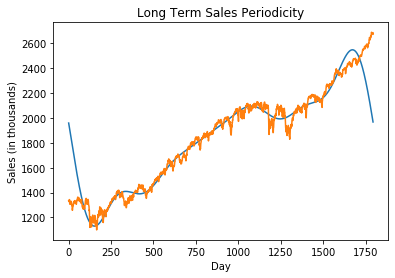

In [16]:
x_filtered = np.fft.ifft(x_hat_filtered, norm="ortho")
x = np.real(x_filtered )
plt.ylabel("Sales (in thousands)")
plt.xlabel("Day")
plt.title("Long Term Sales Periodicity")
plt.plot(x)
plt.plot(stock_value)

In [299]:
sp[]

,series_id,date,value
84020,SP500,2011-02-14,1332.32
84021,SP500,2011-02-15,1328.01
84022,SP500,2011-02-16,1336.32
84023,SP500,2011-02-17,1340.43
84024,SP500,2011-02-18,1343.01
...,...,...,...
85810,SP500,2017-12-25,2683.34
85811,SP500,2017-12-26,2680.50
85812,SP500,2017-12-27,2682.62
85813,SP500,2017-12-28,2687.54


In [17]:
SMA1= sp['value'].rolling(window=50).mean()
SMA2 = sp['value'].rolling(window=200).mean()

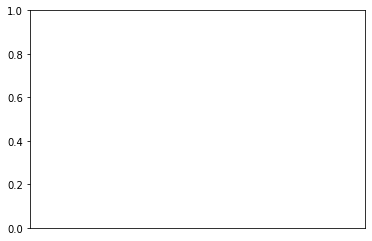

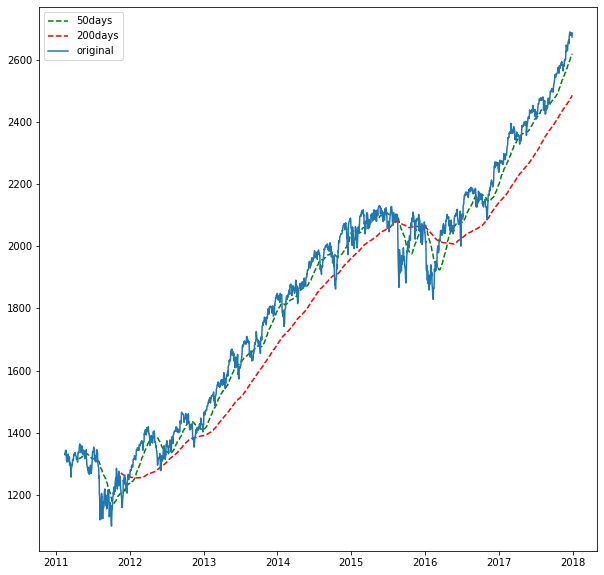

In [303]:
import matplotlib.dates as mdates
ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
plt.figure(figsize=(10,10))
plt.plot(sp['date'],SMA1, 'g--', label="50days")
plt.plot(sp['date'],SMA2, 'r--', label="200days")
plt.plot(sp['date'],sp['value'], label="original")
plt.legend()
plt.show()

In [19]:
middle_band = sp['value'].rolling(window=20).mean()
upper_band = sp['value'].rolling(window=20).mean() + sp['value'].rolling(window=20).std()*2
lower_band = sp['value'].rolling(window=20).mean() - sp['value'].rolling(window=20).std()*2

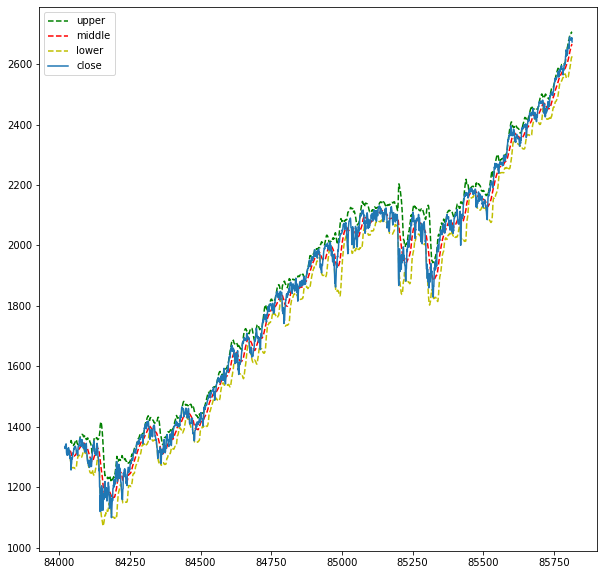

In [20]:
plt.figure(figsize=(10,10))
plt.plot(upper_band, 'g--', label="upper")
plt.plot(middle_band, 'r--', label="middle")
plt.plot(lower_band, 'y--', label="lower")
plt.plot(sp['value'], label="close")
plt.legend()
plt.show()

In [305]:
year = sp[sp['date']>="2017-01-01"]

In [306]:
year.head()

,series_id,date,value
85555,SP500,2017-01-02,2238.83
85556,SP500,2017-01-03,2257.83
85557,SP500,2017-01-04,2270.75
85558,SP500,2017-01-05,2269.00
85559,SP500,2017-01-06,2276.98


In [326]:
year_value = year['value'].values

In [327]:
x_hat = np.fft.fft(year_value, norm="ortho")
k_0 = 12
x_hat_filtered = x_hat
x_hat_filtered[k_0:len(year_value)-k_0] = 0
x_filtered = np.fft.ifft(x_hat_filtered, norm="ortho")
x = np.real(x_filtered )

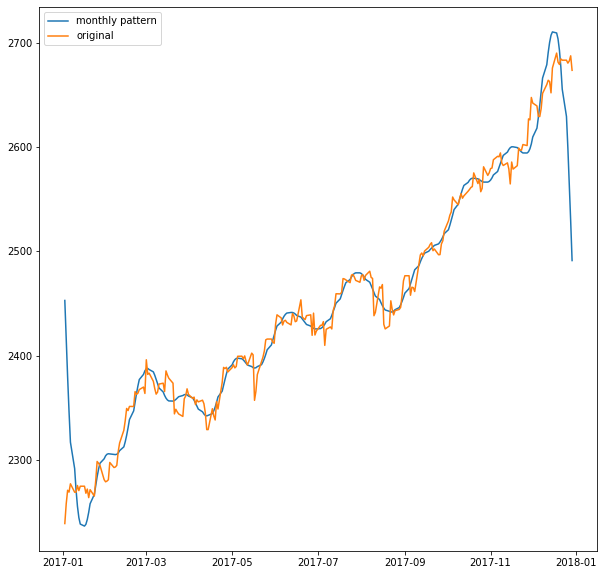

In [328]:
plt.figure(figsize=(10,10))
plt.plot(pd.to_datetime(year['date']),x,label = 'monthly pattern' )
plt.plot(pd.to_datetime(year['date']),year_value,label = 'original' )
plt.legend()
plt.show()

In [318]:
month = sp[sp['date']>="2017-12-01"]
len(month)
month

,series_id,date,value
85794,SP500,2017-12-01,2642.22
85795,SP500,2017-12-04,2639.44
85796,SP500,2017-12-05,2629.57
85797,SP500,2017-12-06,2629.27
85798,SP500,2017-12-07,2636.98
85799,SP500,2017-12-08,2651.50
85800,SP500,2017-12-11,2659.99
85801,SP500,2017-12-12,2664.11
85802,SP500,2017-12-13,2662.85
85803,SP500,2017-12-14,2652.01


In [319]:
month.head()

,series_id,date,value
85794,SP500,2017-12-01,2642.22
85795,SP500,2017-12-04,2639.44
85796,SP500,2017-12-05,2629.57
85797,SP500,2017-12-06,2629.27
85798,SP500,2017-12-07,2636.98


In [320]:
month_value = month['value'].values

In [321]:
x_hat = np.fft.fft(month_value, norm="ortho")
k_0 = 4
x_hat_filtered = x_hat
x_hat_filtered[k_0:len(month_value)-k_0] = 0

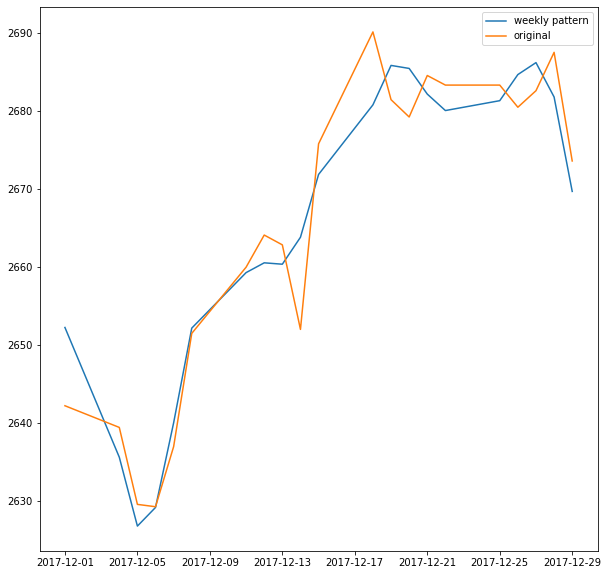

In [324]:
plt.figure(figsize=(10,10))
x_filtered = np.fft.ifft(x_hat_filtered, norm="ortho")
x = np.real(x_filtered )
plt.plot(pd.to_datetime(month['date']),x,label = 'weekly pattern' )
plt.plot(pd.to_datetime(month['date']),month_value,label = 'original' )
plt.legend()
plt.show()

In [30]:
week = sp[sp['date']>="2017-12-25"]

In [31]:
week_value = week['value'].values

In [32]:
x_hat = np.fft.fft(week_value, norm="ortho")
k_0 = 4
x_hat_filtered = x_hat
x_hat_filtered[k_0:len(week_value)-k_0] = 0
x_hat_filtered

array([ 5.99606548e+03+0.j        , -2.99620710e+00-1.6371935j ,
        5.02879290e+00-3.90374467j,  5.02879290e+00+3.90374467j,
       -2.99620710e+00+1.6371935j ])

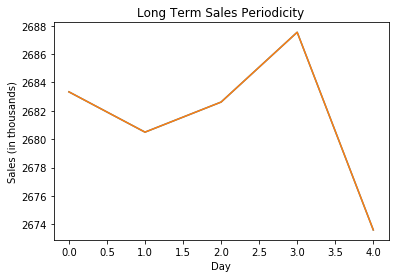

In [33]:

x_filtered = np.fft.ifft(x_hat_filtered, norm="ortho")
x = np.real(x_filtered )
plt.ylabel("Sales (in thousands)")
plt.xlabel("Day")
plt.title("Long Term Sales Periodicity")
plt.plot(x)
plt.plot(week_value)

In [222]:
cleaned = pd.read_csv('4_change_date_range_cut_missing_gt_5pct.csv',index_col=0)

In [223]:
cleaned.head()

,AAA10Y,ASEANTOT,BAA10Y,BUSAPPWNSAUS,BUSAPPWNSAUSYY,CBUSAPPWNSAUS,CBUSAPPWNSAUSYY,CUUR0000SA0R,DEXCHUS,DEXUSEU,...,PCUOMINOMIN,SFTPAGRM158SFRBSF,SP500,T10YIE,TEDRATE,TLAACBW027NBOG,TLBACBW027NBOG,TSIFRGHT,UNRATE,WLEMUINDXD
2011/2/14,1.59,103.4,2.53,59170.0,5.04,11600.0,-9.16,45.2,6.5965,1.3474,...,232.4,-0.005528,1332.32,2.28,0.18,11883.648,10536.178,109.5,9.0,30.44
2011/2/15,1.65,103.4,2.53,59170.0,5.04,11600.0,-9.16,45.2,6.5884,1.3494,...,232.4,-0.005528,1328.01,2.28,0.18,11883.648,10536.178,109.5,9.0,23.19
2011/2/16,1.65,103.4,2.53,59170.0,5.04,11600.0,-9.16,45.2,6.5884,1.3547,...,232.4,-0.005528,1336.32,2.25,0.19,11859.328,10507.025,109.5,9.0,45.74
2011/2/17,1.68,103.4,2.56,59170.0,5.04,11600.0,-9.16,45.2,6.5850,1.3612,...,232.4,-0.005528,1340.43,2.27,0.22,11859.328,10507.025,109.5,9.0,14.88
2011/2/18,1.70,103.4,2.58,59170.0,5.04,11600.0,-9.16,45.2,6.5731,1.3673,...,232.4,-0.005528,1343.01,2.34,0.21,11859.328,10507.025,109.5,9.0,12.48


In [224]:
new_clean = cleaned.fillna(method = 'ffill',axis = 0)

In [225]:
new_clean.isna().sum().sum()

0

In [226]:
new_clean.iloc[1790]

AAA10Y                1.070
ASEANTOT             98.200
BAA10Y                1.790
BUSAPPWNSAUS      59330.000
BUSAPPWNSAUSYY       13.160
                    ...    
TLAACBW027NBOG    16755.683
TLBACBW027NBOG    14903.168
TSIFRGHT            133.600
UNRATE                4.100
WLEMUINDXD           20.560
Name: 2017/12/25, Length: 65, dtype: float64

In [227]:
new_clean.to_csv('5_fill_missing_value.csv')

In [228]:
data = pd.read_csv('5_fill_missing_value.csv', index_col=0)
data.head()

,AAA10Y,ASEANTOT,BAA10Y,BUSAPPWNSAUS,BUSAPPWNSAUSYY,CBUSAPPWNSAUS,CBUSAPPWNSAUSYY,CUUR0000SA0R,DEXCHUS,DEXUSEU,...,PCUOMINOMIN,SFTPAGRM158SFRBSF,SP500,T10YIE,TEDRATE,TLAACBW027NBOG,TLBACBW027NBOG,TSIFRGHT,UNRATE,WLEMUINDXD
2011/2/14,1.59,103.4,2.53,59170.0,5.04,11600.0,-9.16,45.2,6.5965,1.3474,...,232.4,-0.005528,1332.32,2.28,0.18,11883.648,10536.178,109.5,9.0,30.44
2011/2/15,1.65,103.4,2.53,59170.0,5.04,11600.0,-9.16,45.2,6.5884,1.3494,...,232.4,-0.005528,1328.01,2.28,0.18,11883.648,10536.178,109.5,9.0,23.19
2011/2/16,1.65,103.4,2.53,59170.0,5.04,11600.0,-9.16,45.2,6.5884,1.3547,...,232.4,-0.005528,1336.32,2.25,0.19,11859.328,10507.025,109.5,9.0,45.74
2011/2/17,1.68,103.4,2.56,59170.0,5.04,11600.0,-9.16,45.2,6.5850,1.3612,...,232.4,-0.005528,1340.43,2.27,0.22,11859.328,10507.025,109.5,9.0,14.88
2011/2/18,1.70,103.4,2.58,59170.0,5.04,11600.0,-9.16,45.2,6.5731,1.3673,...,232.4,-0.005528,1343.01,2.34,0.21,11859.328,10507.025,109.5,9.0,12.48


In [120]:
def transform_data(filename, num_days):
    input_data =  pd.read_csv(filename, index_col=0)
    sp500= input_data['SP500']
    lst = [[input_data.iloc[i-num_days:i].values,sp500[i]] for i in range(num_days,len(input_data))]
    final = [[np.array([item for sublist in x[0] for item in sublist]),x[1]] for x in lst]
    return final

In [123]:
d = transform_data("5_fill_missing_value.csv", 10)
len(d[0][0])

650

In [124]:
data.iloc[:10]

,AAA10Y,ASEANTOT,BAA10Y,BUSAPPWNSAUS,BUSAPPWNSAUSYY,CBUSAPPWNSAUS,CBUSAPPWNSAUSYY,CUUR0000SA0R,DEXCHUS,DEXUSEU,...,PCUOMINOMIN,SFTPAGRM158SFRBSF,SP500,T10YIE,TEDRATE,TLAACBW027NBOG,TLBACBW027NBOG,TSIFRGHT,UNRATE,WLEMUINDXD
2011/2/14,1.59,103.4,2.53,59170.0,5.04,11600.0,-9.16,45.2,6.5965,1.3474,...,232.4,-0.005528,1332.32,2.28,0.18,11883.648,10536.178,109.5,9.0,30.44
2011/2/15,1.65,103.4,2.53,59170.0,5.04,11600.0,-9.16,45.2,6.5884,1.3494,...,232.4,-0.005528,1328.01,2.28,0.18,11883.648,10536.178,109.5,9.0,23.19
2011/2/16,1.65,103.4,2.53,59170.0,5.04,11600.0,-9.16,45.2,6.5884,1.3547,...,232.4,-0.005528,1336.32,2.25,0.19,11859.328,10507.025,109.5,9.0,45.74
2011/2/17,1.68,103.4,2.56,59170.0,5.04,11600.0,-9.16,45.2,6.5850,1.3612,...,232.4,-0.005528,1340.43,2.27,0.22,11859.328,10507.025,109.5,9.0,14.88
2011/2/18,1.70,103.4,2.58,59170.0,5.04,11600.0,-9.16,45.2,6.5731,1.3673,...,232.4,-0.005528,1343.01,2.34,0.21,11859.328,10507.025,109.5,9.0,12.48
2011/2/21,1.70,103.4,2.58,57020.0,14.34,11510.0,0.44,45.2,6.5731,1.3673,...,232.4,-0.005528,1343.01,2.34,0.21,11859.328,10507.025,109.5,9.0,31.41
2011/2/22,1.74,103.4,2.62,57020.0,14.34,11510.0,0.44,45.2,6.5795,1.3661,...,232.4,-0.005528,1315.44,2.34,0.19,11859.328,10507.025,109.5,9.0,40.86
2011/2/23,1.71,103.4,2.60,57020.0,14.34,11510.0,0.44,45.2,6.5741,1.3758,...,232.4,-0.005528,1307.40,2.39,0.19,11967.252,10605.096,109.5,9.0,34.44
2011/2/24,1.68,103.4,2.59,57020.0,14.34,11510.0,0.44,45.2,6.5720,1.3794,...,232.4,-0.005528,1306.10,2.41,0.18,11967.252,10605.096,109.5,9.0,20.21
2011/2/25,1.70,103.4,2.60,57020.0,14.34,11510.0,0.44,45.2,6.5749,1.3757,...,232.4,-0.005528,1319.88,2.40,0.18,11967.252,10605.096,109.5,9.0,12.45


In [229]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(data) 
data.loc[:,:] = scaled_values

In [230]:
data.to_csv('6_normalized_by_column.csv')

In [231]:
data

,AAA10Y,ASEANTOT,BAA10Y,BUSAPPWNSAUS,BUSAPPWNSAUSYY,CBUSAPPWNSAUS,CBUSAPPWNSAUSYY,CUUR0000SA0R,DEXCHUS,DEXUSEU,...,PCUOMINOMIN,SFTPAGRM158SFRBSF,SP500,T10YIE,TEDRATE,TLAACBW027NBOG,TLBACBW027NBOG,TSIFRGHT,UNRATE,WLEMUINDXD
2011/2/14,0.446281,0.717172,0.411765,0.678729,0.119417,0.58768,0.118887,1.000000,0.606123,0.688667,...,0.790546,0.449218,0.146512,0.753425,0.137931,0.004882,0.006504,0.032129,0.98,0.028725
2011/2/15,0.495868,0.717172,0.411765,0.678729,0.119417,0.58768,0.118887,1.000000,0.597298,0.693111,...,0.790546,0.449218,0.143803,0.753425,0.137931,0.004882,0.006504,0.032129,0.98,0.020603
2011/2/16,0.495868,0.717172,0.411765,0.678729,0.119417,0.58768,0.118887,1.000000,0.597298,0.704889,...,0.790546,0.449218,0.149026,0.732877,0.155172,0.000000,0.000000,0.032129,0.98,0.045865
2011/2/17,0.520661,0.717172,0.427807,0.678729,0.119417,0.58768,0.118887,1.000000,0.593593,0.719333,...,0.790546,0.449218,0.151609,0.746575,0.206897,0.000000,0.000000,0.032129,0.98,0.011293
2011/2/18,0.537190,0.717172,0.438503,0.678729,0.119417,0.58768,0.118887,1.000000,0.580628,0.732889,...,0.790546,0.449218,0.153231,0.794521,0.189655,0.000000,0.000000,0.032129,0.98,0.008604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017/12/25,0.016529,0.191919,0.016043,0.680685,0.129887,0.54162,0.141706,0.021277,0.582698,0.325333,...,0.379788,0.855148,0.995713,0.520548,0.482759,0.982800,0.980796,1.000000,0.00,0.017656
2017/12/26,0.008264,0.191919,0.010695,0.680685,0.129887,0.54162,0.141706,0.021277,0.547723,0.331556,...,0.379788,0.855148,0.993928,0.520548,0.482759,0.982800,0.980796,1.000000,0.00,0.040947
2017/12/27,0.000000,0.191919,0.000000,0.680685,0.129887,0.54162,0.141706,0.021277,0.561996,0.339333,...,0.379788,0.855148,0.995261,0.520548,0.293103,0.983395,0.981184,1.000000,0.00,0.010251
2017/12/28,0.000000,0.191919,0.000000,0.680685,0.129887,0.54162,0.141706,0.021277,0.536065,0.350444,...,0.379788,0.855148,0.998353,0.534247,0.379310,0.983395,0.981184,1.000000,0.00,0.008929


In [294]:
data = pd.read_csv('5_fill_missing_value.csv', index_col=0)
daily = ['AAA10Y',
 'BAA10Y',
 'DEXCHUS',
 'DEXJPUS',
 'DEXUSEU',
 'DEXUSUK',
 'DFII10',
 'DFII20',
 'DFII30',
 'DFII5',
 'DFII7',
 'DLTIIT',
 'DPCREDIT',
 'DPRIME',
 'EFFR',
 'EFFRVOL',
 'OBFR',
 'OBFRVOL',
'SP500',
 'SOFR',
 'SOFRVOL',
 'T10YIE',
 'TEDRATE']

In [295]:
new_data = data.pct_change()

In [296]:
new_data=new_data.fillna(0)
new_data

,AAA10Y,ASEANTOT,BAA10Y,BUSAPPWNSAUS,BUSAPPWNSAUSYY,CBUSAPPWNSAUS,CBUSAPPWNSAUSYY,CUUR0000SA0R,DEXCHUS,DEXUSEU,...,PCUOMINOMIN,SFTPAGRM158SFRBSF,SP500,T10YIE,TEDRATE,TLAACBW027NBOG,TLBACBW027NBOG,TSIFRGHT,UNRATE,WLEMUINDXD
2011/2/14,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
2011/2/15,0.037736,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,-0.001228,0.001484,...,0.0,0.0,-0.003235,0.000000,0.000000,0.000000,0.000000,0.0,0.0,-0.238173
2011/2/16,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.003928,...,0.0,0.0,0.006257,-0.013158,0.055556,-0.002047,-0.002767,0.0,0.0,0.972402
2011/2/17,0.018182,0.0,0.011858,0.000000,0.0000,0.000000,0.000000,0.0,-0.000516,0.004798,...,0.0,0.0,0.003076,0.008889,0.157895,0.000000,0.000000,0.0,0.0,-0.674683
2011/2/18,0.011905,0.0,0.007812,0.000000,0.0000,0.000000,0.000000,0.0,-0.001807,0.004481,...,0.0,0.0,0.001925,0.030837,-0.045455,0.000000,0.000000,0.0,0.0,-0.161290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017/12/25,0.000000,0.0,0.000000,-0.022087,0.6743,0.011268,-6.480392,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.801090
2017/12/26,-0.009346,0.0,-0.005587,0.000000,0.0000,0.000000,0.000000,0.0,-0.004882,0.002365,...,0.0,0.0,-0.001058,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.011187
2017/12/27,-0.009434,0.0,-0.011236,0.000000,0.0000,0.000000,0.000000,0.0,0.002002,0.002949,...,0.0,0.0,0.000791,0.000000,-0.289474,0.000177,0.000117,0.0,0.0,-0.662636
2017/12/28,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,-0.003630,0.004201,...,0.0,0.0,0.001834,0.010309,0.185185,0.000000,0.000000,0.0,0.0,-0.084588


In [252]:
new_data.to_csv('7_percentage_change_difference.csv')

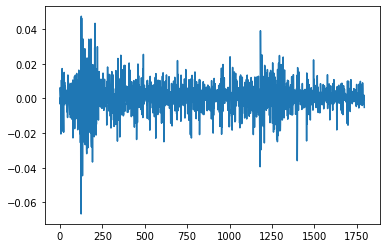

In [298]:
new_data=new_data.fillna(0)
new_data=new_data.replace(float('-inf'), 0)
new_data=new_data.replace(float('inf'), 0)
plt.plot(range(len(new_data['SP500'])),new_data['SP500'])

In [292]:
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(new_data) 
new_data.loc[:,:] = scaled_values
new_data

,AAA10Y,ASEANTOT,BAA10Y,BUSAPPWNSAUS,BUSAPPWNSAUSYY,CBUSAPPWNSAUS,CBUSAPPWNSAUSYY,CUUR0000SA0R,DEXCHUS,DEXUSEU,...,PCUOMINOMIN,SFTPAGRM158SFRBSF,SP500,T10YIE,TEDRATE,TLAACBW027NBOG,TLBACBW027NBOG,TSIFRGHT,UNRATE,WLEMUINDXD
2011/2/14,0.486726,0.599768,0.433083,0.068021,0.498613,0.076849,0.594935,0.609334,0.402381,0.458714,...,0.610538,0.01098,0.584301,0.539537,0.428571,0.429925,0.418034,0.53188,0.668317,0.014249
2011/2/15,0.777258,0.599768,0.433083,0.068021,0.498613,0.076849,0.594935,0.609334,0.362340,0.484534,...,0.610538,0.01098,0.555935,0.539537,0.428571,0.429925,0.418034,0.53188,0.668317,0.010803
2011/2/16,0.486726,0.599768,0.433083,0.068021,0.498613,0.076849,0.594935,0.609334,0.402381,0.527036,...,0.610538,0.01098,0.639172,0.451507,0.492063,0.386549,0.365117,0.53188,0.668317,0.028318
2011/2/17,0.626710,0.599768,0.582008,0.068021,0.498613,0.076849,0.594935,0.609334,0.385553,0.542178,...,0.610538,0.01098,0.611271,0.599006,0.609023,0.429925,0.418034,0.53188,0.668317,0.004487
2011/2/18,0.578382,0.599768,0.531203,0.068021,0.498613,0.076849,0.594935,0.609334,0.343453,0.536667,...,0.610538,0.01098,0.601179,0.745844,0.376623,0.429925,0.418034,0.53188,0.668317,0.011915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017/12/25,0.486726,0.599768,0.433083,0.066384,0.501055,0.077807,0.573575,0.609334,0.402381,0.458714,...,0.610538,0.01098,0.584301,0.539537,0.428571,0.429925,0.418034,0.53188,0.668317,0.040308
2017/12/26,0.414771,0.599768,0.362918,0.068021,0.498613,0.076849,0.594935,0.609334,0.243182,0.499854,...,0.610538,0.01098,0.575021,0.539537,0.428571,0.429925,0.418034,0.53188,0.668317,0.028880
2017/12/27,0.414093,0.599768,0.291966,0.068021,0.498613,0.076849,0.594935,0.609334,0.467669,0.510018,...,0.610538,0.01098,0.591236,0.539537,0.097744,0.433672,0.420267,0.53188,0.668317,0.004661
2017/12/28,0.486726,0.599768,0.433083,0.068021,0.498613,0.076849,0.594935,0.609334,0.284004,0.531790,...,0.610538,0.01098,0.600383,0.608509,0.640212,0.429925,0.418034,0.53188,0.668317,0.013025


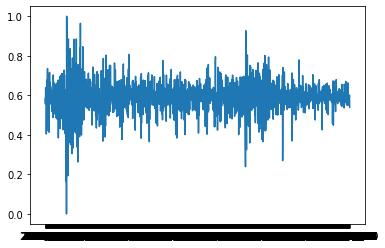

In [163]:
new_data.to_csv('8_percentage_change_difference_normalized.csv')

In [170]:
x_hat = new_data.apply(lambda x: np.fft.fft(x,norm="ortho"), axis = 1)

,0
2011/2/14,"[(2.4396917908821143+0j), (0.2888159628513837+..."
2011/2/15,"[(2.4456438166510734+0j), (0.2976434189256585+..."
2011/2/16,"[(2.331330745327164+0j), (0.19658726469871846-..."
2011/2/17,"[(2.4796133514895993+0j), (0.3045206430241806+..."
2011/2/18,"[(2.4297110194048357+0j), (0.29964144811856513..."
...,...
2017/12/25,"[(2.443348667887744+0j), (0.2921144841380979+0..."
2017/12/26,"[(2.3641152582170606+0j), (0.21431968695295853..."
2017/12/27,"[(2.22352865302399+0j), (0.08690506012021164+0..."
2017/12/28,"[(2.4558349828492476+0j), (0.3105455324247475+..."


In [415]:
data = pd.read_csv('5_fill_missing_value.csv', index_col=0)
data

,AAA10Y,ASEANTOT,BAA10Y,BUSAPPWNSAUS,BUSAPPWNSAUSYY,CBUSAPPWNSAUS,CBUSAPPWNSAUSYY,CUUR0000SA0R,DEXCHUS,DEXUSEU,...,PCUOMINOMIN,SFTPAGRM158SFRBSF,SP500,T10YIE,TEDRATE,TLAACBW027NBOG,TLBACBW027NBOG,TSIFRGHT,UNRATE,WLEMUINDXD
2011/2/14,1.59,103.4,2.53,59170.0,5.04,11600.0,-9.16,45.2,6.5965,1.3474,...,232.4,-0.005528,1332.32,2.28,0.18,11883.648,10536.178,109.5,9.0,30.44
2011/2/15,1.65,103.4,2.53,59170.0,5.04,11600.0,-9.16,45.2,6.5884,1.3494,...,232.4,-0.005528,1328.01,2.28,0.18,11883.648,10536.178,109.5,9.0,23.19
2011/2/16,1.65,103.4,2.53,59170.0,5.04,11600.0,-9.16,45.2,6.5884,1.3547,...,232.4,-0.005528,1336.32,2.25,0.19,11859.328,10507.025,109.5,9.0,45.74
2011/2/17,1.68,103.4,2.56,59170.0,5.04,11600.0,-9.16,45.2,6.5850,1.3612,...,232.4,-0.005528,1340.43,2.27,0.22,11859.328,10507.025,109.5,9.0,14.88
2011/2/18,1.70,103.4,2.58,59170.0,5.04,11600.0,-9.16,45.2,6.5731,1.3673,...,232.4,-0.005528,1343.01,2.34,0.21,11859.328,10507.025,109.5,9.0,12.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017/12/25,1.07,98.2,1.79,59330.0,13.16,10770.0,5.59,40.6,6.5750,1.1839,...,182.0,0.135646,2683.34,1.94,0.38,16755.683,14903.168,133.6,4.1,20.56
2017/12/26,1.06,98.2,1.78,59330.0,13.16,10770.0,5.59,40.6,6.5429,1.1867,...,182.0,0.135646,2680.50,1.94,0.38,16755.683,14903.168,133.6,4.1,41.35
2017/12/27,1.05,98.2,1.76,59330.0,13.16,10770.0,5.59,40.6,6.5560,1.1902,...,182.0,0.135646,2682.62,1.94,0.27,16758.645,14904.908,133.6,4.1,13.95
2017/12/28,1.05,98.2,1.76,59330.0,13.16,10770.0,5.59,40.6,6.5322,1.1952,...,182.0,0.135646,2687.54,1.96,0.32,16758.645,14904.908,133.6,4.1,12.77


In [416]:
new_data = data.pct_change()

In [417]:
new_data=new_data.fillna(0)
new_data=new_data.replace(float('-inf'), 0)
new_data=new_data.replace(float('inf'), 0)

In [418]:
new_data = new_data.iloc[260:]
new_data

,AAA10Y,ASEANTOT,BAA10Y,BUSAPPWNSAUS,BUSAPPWNSAUSYY,CBUSAPPWNSAUS,CBUSAPPWNSAUSYY,CUUR0000SA0R,DEXCHUS,DEXUSEU,...,PCUOMINOMIN,SFTPAGRM158SFRBSF,SP500,T10YIE,TEDRATE,TLAACBW027NBOG,TLBACBW027NBOG,TSIFRGHT,UNRATE,WLEMUINDXD
2012/2/13,0.005376,0.0,0.006309,0.263584,-1.134633,0.240166,-1.163754,0.0,-0.000302,0.001820,...,0.0,0.0,0.006800,0.004545,-0.071429,0.000000,0.000000,0.0,0.0,-0.166485
2012/2/14,-0.005348,0.0,-0.003135,0.000000,0.000000,0.000000,0.000000,0.0,0.000365,-0.004693,...,0.0,0.0,-0.000940,-0.009050,-0.025641,0.000000,0.000000,0.0,0.0,-0.263272
2012/2/15,0.010753,0.0,0.003145,0.000000,0.000000,0.000000,0.000000,0.0,0.000048,-0.004715,...,0.0,0.0,-0.005383,0.000000,0.026316,0.003922,0.004036,0.0,0.0,-0.606615
2012/2/16,0.000000,0.0,-0.006270,0.000000,0.000000,0.000000,0.000000,0.0,0.000254,0.001757,...,0.0,0.0,0.011026,0.018265,0.000000,0.000000,0.000000,0.0,0.0,-0.196697
2012/2/17,-0.010638,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-0.000460,0.002975,...,0.0,0.0,0.002349,0.004484,0.025641,0.000000,0.000000,0.0,0.0,1.562617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017/12/25,0.000000,0.0,0.000000,-0.022087,0.674300,0.011268,-6.480392,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.801090
2017/12/26,-0.009346,0.0,-0.005587,0.000000,0.000000,0.000000,0.000000,0.0,-0.004882,0.002365,...,0.0,0.0,-0.001058,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.011187
2017/12/27,-0.009434,0.0,-0.011236,0.000000,0.000000,0.000000,0.000000,0.0,0.002002,0.002949,...,0.0,0.0,0.000791,0.000000,-0.289474,0.000177,0.000117,0.0,0.0,-0.662636
2017/12/28,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-0.003630,0.004201,...,0.0,0.0,0.001834,0.010309,0.185185,0.000000,0.000000,0.0,0.0,-0.084588


In [419]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean = 0)
scaled_values = scaler.fit_transform(new_data) 
new_data.loc[:,:] = scaled_values
new_data
print(scaler.var_)
print(scaler.mean_)

[1.81408043e-04 6.72127115e-07 5.69258095e-05 4.42448132e-02
 3.15958690e+01 3.94837049e-02 4.99786909e+01 5.06528345e-07
 2.43538201e-06 2.85272336e-05 2.99002915e-05 1.02311796e-01
 4.63288476e-01 2.55864171e-03 6.16890440e-01 4.01318071e-01
 3.08471423e-01 1.70044940e-04 1.48250196e-05 1.26022784e-06
 1.58624173e-02 5.18786743e-05 2.50177074e-06 1.70221348e-06
 2.91323477e-06 2.15309491e-05 4.78438165e-05 1.48564920e-06
 2.52292742e-06 4.45165457e-06 5.90211223e-06 4.39838567e-06
 2.67305322e-06 8.42382807e-07 2.79670785e-06 1.14082734e-06
 7.59003068e-06 9.24016968e-01 9.51279884e-04 9.51279884e-04
 5.06747999e-03 8.11662089e-05 6.90845842e-05 2.57540168e-06
 3.13773339e-07 2.08279208e-06 4.48705864e-06 1.74445249e-07
 7.46195894e-07 1.78167509e-06 2.18645400e-06 1.57907412e-06
 3.39428739e-07 1.91888498e-06 2.21219588e-06 5.82427200e-05
 3.63469380e-01 5.59167829e-05 1.76525444e-04 3.21075812e-03
 5.12478621e-06 6.53786909e-06 4.16473154e-06 2.68415861e-05
 1.42963398e+01]
[-2.817

In [385]:
new_data.to_csv('9_percentage_change_difference_normalized_rescale.csv')

In [271]:

scaler.get_params()

[-2.60378038e-17  1.62013002e-17  2.77736574e-17 -3.47170718e-18
 -1.85157716e-17  1.27295930e-17  1.15723573e-17 -1.38868287e-17
 -4.62894290e-18  1.27295930e-17  1.15723573e-17 -1.62013002e-17
  5.78617863e-18  1.50440644e-17  0.00000000e+00  2.31447145e-17
  4.62894290e-18 -1.38868287e-17  0.00000000e+00 -1.27295930e-17
 -2.31447145e-18 -2.43019502e-17  1.56226823e-17 -2.08302431e-17
  1.44654466e-17  9.25788581e-18  1.96730073e-17  3.18239825e-17
 -5.78617863e-18  4.62894290e-18  1.85157716e-17  1.62013002e-17
 -4.62894290e-18  2.08302431e-17 -2.08302431e-17  1.15723573e-17
  3.70315432e-17  2.31447145e-18  0.00000000e+00  0.00000000e+00
 -7.23272329e-18 -1.15723573e-18  5.78617863e-18  1.38868287e-17
 -2.19874788e-17  2.31447145e-18  1.27295930e-17  1.73585359e-18
  2.31447145e-18  1.04151215e-17  1.96730073e-17 -2.89308931e-17
  2.31447145e-17  1.96730073e-17  2.31447145e-18  2.31447145e-17
  1.15723573e-17  1.73585359e-17  2.31447145e-18 -2.31447145e-18
  3.24026003e-17  1.15723

{'copy': True, 'with_mean': 0, 'with_std': True}

In [403]:
test= pd.read_csv('3_test.csv', index_col=0)
test

,AAA10Y,ASEANTOT,BAA10Y,BUSAPPWNSAUS,BUSAPPWNSAUSYY,CBUSAPPWNSAUS,CBUSAPPWNSAUSYY,CUUR0000SA0R,DEXCHUS,DEXUSEU,...,SOFR,SOFRVOL,SP500,T10YIE,TEDRATE,TLAACBW027NBOG,TLBACBW027NBOG,TSIFRGHT,UNRATE,WLEMUINDXD
2018-01-02,1.06,NaN,1.78,NaN,NaN,NaN,NaN,NaN,6.4910,1.2050,...,NaN,NaN,2695.81,2.00,0.28,NaN,NaN,NaN,NaN,9.12
2018-01-03,1.06,NaN,1.77,NaN,NaN,NaN,NaN,NaN,6.5010,1.2030,...,NaN,NaN,2713.06,1.98,0.31,16746.697,14922.905,NaN,NaN,12.52
2018-01-04,1.01,NaN,1.75,NaN,NaN,NaN,NaN,NaN,6.4915,1.2064,...,NaN,NaN,2723.99,2.01,0.31,16746.697,14922.905,NaN,NaN,70.37
2018-01-05,1.03,NaN,1.76,NaN,NaN,NaN,NaN,NaN,6.4875,1.2039,...,NaN,NaN,2743.15,2.01,0.33,16746.697,14922.905,NaN,NaN,34.79
2018-01-08,1.01,NaN,1.74,76910.0,26.21,14440.0,22.48,NaN,6.4970,1.1973,...,NaN,NaN,2747.71,2.02,0.28,16746.697,14922.905,NaN,NaN,9.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-08,1.42,NaN,2.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.02,920.0,3915.59,2.22,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-09,1.42,NaN,2.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.05,901.0,3911.23,2.22,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-10,1.43,NaN,2.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.06,884.0,3909.88,2.21,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.06,891.0,3916.38,2.20,NaN,NaN,NaN,NaN,NaN,NaN


In [404]:
test = test.fillna(0)

In [424]:
new_test = test.pct_change()
new_test = new_test.fillna(0)
new_test=new_test.replace(float('-inf'), 0)
new_test=new_test.replace(float('inf'), 0)
new_test

,AAA10Y,ASEANTOT,BAA10Y,BUSAPPWNSAUS,BUSAPPWNSAUSYY,CBUSAPPWNSAUS,CBUSAPPWNSAUSYY,CUUR0000SA0R,DEXCHUS,DEXUSEU,...,SOFR,SOFRVOL,SP500,T10YIE,TEDRATE,TLAACBW027NBOG,TLBACBW027NBOG,TSIFRGHT,UNRATE,WLEMUINDXD
2018-01-02,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
2018-01-03,0.000000,0.0,-0.005618,0.0,0.0,0.0,0.0,0.0,0.001541,-0.001660,...,0.0,0.000000,0.006399,-0.010000,0.107143,0.0,0.0,0.0,0.0,0.372807
2018-01-04,-0.047170,0.0,-0.011299,0.0,0.0,0.0,0.0,0.0,-0.001461,0.002826,...,0.0,0.000000,0.004029,0.015152,0.000000,0.0,0.0,0.0,0.0,4.620607
2018-01-05,0.019802,0.0,0.005714,0.0,0.0,0.0,0.0,0.0,-0.000616,-0.002072,...,0.0,0.000000,0.007034,0.000000,0.064516,0.0,0.0,0.0,0.0,-0.505613
2018-01-08,-0.019417,0.0,-0.011364,0.0,0.0,0.0,0.0,0.0,0.001464,-0.005482,...,0.0,0.000000,0.001662,0.004975,-0.151515,0.0,0.0,0.0,0.0,-0.722334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-08,-0.013889,0.0,-0.018349,0.0,0.0,0.0,0.0,0.0,-1.000000,-1.000000,...,0.0,-0.013934,0.007399,0.004525,0.000000,0.0,0.0,0.0,0.0,0.000000
2021-02-09,0.000000,0.0,0.004673,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,1.5,-0.020652,-0.001113,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
2021-02-10,0.007042,0.0,0.004651,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.2,-0.018868,-0.000345,-0.004505,0.000000,0.0,0.0,0.0,0.0,0.000000
2021-02-11,-1.000000,0.0,-1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.007919,0.001662,-0.004525,0.000000,0.0,0.0,0.0,0.0,0.000000


In [406]:
print(scaler.var_)
print(len(scaler.mean_))

[1.81408043e-04 6.72127115e-07 5.69258095e-05 4.42448132e-02
 3.15958690e+01 3.94837049e-02 4.99786909e+01 5.06528345e-07
 2.43538201e-06 2.85272336e-05 2.99002915e-05 1.02311796e-01
 4.63288476e-01 2.55864171e-03 6.16890440e-01 4.01318071e-01
 3.08471423e-01 1.70044940e-04 1.48250196e-05 1.26022784e-06
 1.58624173e-02 5.18786743e-05 2.50177074e-06 1.70221348e-06
 2.91323477e-06 2.15309491e-05 4.78438165e-05 1.48564920e-06
 2.52292742e-06 4.45165457e-06 5.90211223e-06 4.39838567e-06
 2.67305322e-06 8.42382807e-07 2.79670785e-06 1.14082734e-06
 7.59003068e-06 9.24016968e-01 9.51279884e-04 9.51279884e-04
 5.06747999e-03 8.11662089e-05 6.90845842e-05 2.57540168e-06
 3.13773339e-07 2.08279208e-06 4.48705864e-06 1.74445249e-07
 7.46195894e-07 1.78167509e-06 2.18645400e-06 1.57907412e-06
 3.39428739e-07 1.91888498e-06 2.21219588e-06 5.82427200e-05
 3.63469380e-01 5.59167829e-05 1.76525444e-04 3.21075812e-03
 5.12478621e-06 6.53786909e-06 4.16473154e-06 2.68415861e-05
 1.42963398e+01]
65


In [407]:
new_data.columns

Index(['AAA10Y', 'ASEANTOT', 'BAA10Y', 'BUSAPPWNSAUS', 'BUSAPPWNSAUSYY',
       'CBUSAPPWNSAUS', 'CBUSAPPWNSAUSYY', 'CUUR0000SA0R', 'DEXCHUS',
       'DEXUSEU', 'DEXUSUK', 'DFII10', 'DFII20', 'DFII30', 'DFII5', 'DFII7',
       'DLTIIT', 'DPCREDIT', 'DPRIME', 'EECTOT', 'EFFR', 'FRGSHPUSM649NCIS',
       'GVIPT50002S', 'GVIPT50030S', 'GVIPT51000S', 'GVIPT51100S',
       'GVIPT51110S', 'GVIPT51120S', 'GVIPT51200S', 'GVIPT52000S',
       'GVIPT52100S', 'GVIPT521A3S', 'GVIPT52300S', 'GVIPT54000S',
       'GVIPT54100S', 'GVIPT54200S', 'GVIPT54220S', 'INFECTDISEMVTRACKD',
       'IOER', 'IORR', 'MEDCPIM158SFRBCLE', 'MORTGAGE15US', 'MORTGAGE30US',
       'PCUADLVWRADLVWR', 'PCUAINFOAINFO', 'PCUAMUMAMUM', 'PCUARETTRARETTR',
       'PCUASHCASHC', 'PCUASTDSVASTDSV', 'PCUATRADEATRADE', 'PCUATRANSATRANS',
       'PCUATRNWRATRNWR', 'PCUATTDSVATTDSV', 'PCUAWHLTRAWHLTR', 'PCUOMFGOMFG',
       'PCUOMINOMIN', 'SFTPAGRM158SFRBSF', 'SP500', 'T10YIE', 'TEDRATE',
       'TLAACBW027NBOG', 'TLBACBW027NBOG', '

In [420]:
final_column = new_test.columns.intersection(new_data.columns)

,AAA10Y,ASEANTOT,BAA10Y,BUSAPPWNSAUS,BUSAPPWNSAUSYY,CBUSAPPWNSAUS,CBUSAPPWNSAUSYY,CUUR0000SA0R,DEXCHUS,DEXUSEU,...,SOFR,SOFRVOL,SP500,T10YIE,TEDRATE,TLAACBW027NBOG,TLBACBW027NBOG,TSIFRGHT,UNRATE,WLEMUINDXD
2018-01-02,6.358370e+05,1.285449e+11,1.436061e+07,-23.453346,0.011673,-28.897522,0.0156,2.774025e+11,-2.409385e+09,1.058193e+07,...,0.0,0.000000,-2.039463e+07,-3.142918e+04,-2417.012807,-3.087876e+09,-1.708376e+09,-3.287985e+09,1.193950e+08,-0.243201
2018-01-03,6.358370e+05,1.285449e+11,-2.154166e+08,-23.453346,0.011673,-28.897522,0.0156,2.774025e+11,1.640356e+11,-3.712690e+08,...,0.0,0.000000,2.532862e+08,-2.418502e+07,181001.956257,-3.087876e+09,-1.708376e+09,-3.287985e+09,1.193950e+08,-0.242719
2018-01-04,-1.057841e+08,1.285449e+11,-4.477902e+08,-23.453346,0.011673,-28.897522,0.0156,2.774025e+11,-1.602889e+11,6.608076e+08,...,0.0,0.000000,1.519133e+08,3.656492e+07,-2417.012807,-3.087876e+09,-1.708376e+09,-3.287985e+09,1.193950e+08,-0.237222
2018-01-05,4.531112e+07,1.285449e+11,2.480769e+08,-23.453346,0.011673,-28.897522,0.0156,2.774025e+11,-6.898224e+10,-4.661778e+08,...,0.0,0.000000,2.804447e+08,-3.142918e+04,108028.818027,-3.087876e+09,-1.708376e+09,-3.287985e+09,1.193950e+08,-0.243856
2018-01-08,-4.317196e+07,1.285449e+11,-4.504160e+08,-23.453346,0.011673,-28.897522,0.0156,2.774025e+11,1.557986e+11,-1.250677e+09,...,0.0,0.000000,5.070377e+07,1.198528e+07,-261797.373098,-3.087876e+09,-1.708376e+09,-3.287985e+09,1.193950e+08,-0.244136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-08,-3.069891e+07,1.285449e+11,-7.361044e+08,-23.453346,0.011673,-28.897522,0.0156,2.774025e+11,-1.080418e+14,-2.300546e+11,...,0.0,-0.013934,2.960793e+08,1.089780e+07,-2417.012807,-3.087876e+09,-1.708376e+09,-3.287985e+09,1.193950e+08,-0.243201
2021-02-09,6.358370e+05,1.285449e+11,2.054837e+08,-23.453346,0.011673,-28.897522,0.0156,2.774025e+11,-2.409385e+09,1.058193e+07,...,1.5,-0.020652,-6.801951e+07,-3.142918e+04,-2417.012807,-3.087876e+09,-1.708376e+09,-3.287985e+09,1.193950e+08,-0.243201
2021-02-10,1.652388e+07,1.285449e+11,2.045948e+08,-23.453346,0.011673,-28.897522,0.0156,2.774025e+11,-2.409385e+09,1.058193e+07,...,0.2,-0.018868,-3.515731e+07,-1.091143e+07,-2417.012807,-3.087876e+09,-1.708376e+09,-3.287985e+09,1.193950e+08,-0.243201
2021-02-11,-2.255466e+09,1.285449e+11,-4.088598e+10,-23.453346,0.011673,-28.897522,0.0156,2.774025e+11,-2.409385e+09,1.058193e+07,...,0.0,0.007919,5.070944e+07,-1.096066e+07,-2417.012807,-3.087876e+09,-1.708376e+09,-3.287985e+09,1.193950e+08,-0.243201


In [421]:
for i in range(0,len(final_column)):
    new_test[final_column[i]]= (new_test[final_column[i]]-scaler.mean_[i])/np.sqrt(scaler.var_[i])

In [422]:
final = new_test[final_column]
final

,AAA10Y,ASEANTOT,BAA10Y,BUSAPPWNSAUS,BUSAPPWNSAUSYY,CBUSAPPWNSAUS,CBUSAPPWNSAUSYY,CUUR0000SA0R,DEXCHUS,DEXUSEU,...,PCUOMINOMIN,SFTPAGRM158SFRBSF,SP500,T10YIE,TEDRATE,TLAACBW027NBOG,TLBACBW027NBOG,TSIFRGHT,UNRATE,WLEMUINDXD
2018-01-02,6.358370e+05,1.285449e+11,1.436061e+07,-23.453346,0.011673,-28.897522,0.0156,2.774025e+11,-2.409385e+09,1.058193e+07,...,5.273534e+06,-0.300721,-2.039463e+07,-3.142918e+04,-2417.012807,-3.087876e+09,-1.708376e+09,-3.287985e+09,1.193950e+08,-0.243201
2018-01-03,6.358370e+05,1.285449e+11,-2.154166e+08,-23.453346,0.011673,-28.897522,0.0156,2.774025e+11,1.640356e+11,-3.712690e+08,...,5.273534e+06,-0.300721,2.532862e+08,-2.418502e+07,181001.956257,-3.087876e+09,-1.708376e+09,-3.287985e+09,1.193950e+08,-0.242719
2018-01-04,-1.057841e+08,1.285449e+11,-4.477902e+08,-23.453346,0.011673,-28.897522,0.0156,2.774025e+11,-1.602889e+11,6.608076e+08,...,5.273534e+06,-0.300721,1.519133e+08,3.656492e+07,-2417.012807,-3.087876e+09,-1.708376e+09,-3.287985e+09,1.193950e+08,-0.237222
2018-01-05,4.531112e+07,1.285449e+11,2.480769e+08,-23.453346,0.011673,-28.897522,0.0156,2.774025e+11,-6.898224e+10,-4.661778e+08,...,5.273534e+06,-0.300721,2.804447e+08,-3.142918e+04,108028.818027,-3.087876e+09,-1.708376e+09,-3.287985e+09,1.193950e+08,-0.243856
2018-01-08,-4.317196e+07,1.285449e+11,-4.504160e+08,-23.453346,0.011673,-28.897522,0.0156,2.774025e+11,1.557986e+11,-1.250677e+09,...,5.273534e+06,-0.300721,5.070377e+07,1.198528e+07,-261797.373098,-3.087876e+09,-1.708376e+09,-3.287985e+09,1.193950e+08,-0.244136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-08,-3.069891e+07,1.285449e+11,-7.361044e+08,-23.453346,0.011673,-28.897522,0.0156,2.774025e+11,-1.080418e+14,-2.300546e+11,...,5.273534e+06,-0.300721,2.960793e+08,1.089780e+07,-2417.012807,-3.087876e+09,-1.708376e+09,-3.287985e+09,1.193950e+08,-0.243201
2021-02-09,6.358370e+05,1.285449e+11,2.054837e+08,-23.453346,0.011673,-28.897522,0.0156,2.774025e+11,-2.409385e+09,1.058193e+07,...,5.273534e+06,-0.300721,-6.801951e+07,-3.142918e+04,-2417.012807,-3.087876e+09,-1.708376e+09,-3.287985e+09,1.193950e+08,-0.243201
2021-02-10,1.652388e+07,1.285449e+11,2.045948e+08,-23.453346,0.011673,-28.897522,0.0156,2.774025e+11,-2.409385e+09,1.058193e+07,...,5.273534e+06,-0.300721,-3.515731e+07,-1.091143e+07,-2417.012807,-3.087876e+09,-1.708376e+09,-3.287985e+09,1.193950e+08,-0.243201
2021-02-11,-2.255466e+09,1.285449e+11,-4.088598e+10,-23.453346,0.011673,-28.897522,0.0156,2.774025e+11,-2.409385e+09,1.058193e+07,...,5.273534e+06,-0.300721,5.070944e+07,-1.096066e+07,-2417.012807,-3.087876e+09,-1.708376e+09,-3.287985e+09,1.193950e+08,-0.243201


In [373]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean = 0)
scaled_values = scaler.fit_transform(new_test) 
new_test.loc[:,:] = scaled_values
new_test
print(scaler.var_)
scaler.get_params(deep=True)

[4.30405322e-02 1.22726845e-03 4.24489693e-02 9.44666259e-03
 6.92012435e+01 8.48999382e-03 1.95909311e+03 1.22724763e-03
 4.22755334e-02 4.22871697e-02 4.23036730e-02 1.56465896e-01
 8.43266935e-02 7.58921735e-01 2.22756234e-01 3.05481228e-01
 2.58939092e-01 2.27390758e-03 3.44359229e-02 1.22723122e-03
 3.85185099e-02 4.31878793e-02 1.28511057e-03 1.27210361e-03
 1.26413106e-03 1.26706658e-03 1.56925637e-03 1.94865819e-03
 1.25567429e-03 1.23706199e-03 1.28970694e-03 1.30825592e-03
 1.29005359e-03 1.24232438e-03 1.24650153e-03 1.25125016e-03
 1.24483765e-03 1.26222930e-03 3.20510789e-01 1.27844113e-03
 1.27844113e-03 3.14644702e-03 4.95633823e-03 4.95402082e-03
 3.88672413e-02 4.71621055e-02 1.22854125e-03 1.22732020e-03
 1.22928248e-03 1.23096497e-03 1.22728483e-03 1.22790052e-03
 1.22843260e-03 1.23094032e-03 1.22974139e-03 1.22740959e-03
 1.22803624e-03 1.22985646e-03 1.29187531e-03 2.78034497e-01
 8.20419220e-02 3.99991847e-02 3.57372358e-02 4.31982222e-02
 6.05921936e-02 1.232843

{'copy': True, 'with_mean': 0, 'with_std': True}

In [287]:
new_test.to_csv('1_test_percentage_change_difference_normalized_rescale.csv')

In [334]:
train = pd.read_csv('observations_train.csv')
test = pd.read_csv('observations_test.csv')
len(train)


103304

In [331]:
combined  = train.append(test)
len(combined )

127346

In [332]:
combined.to_csv('combined.csv')

In [345]:
combined = pd.read_csv('4_combined.csv')

In [346]:
new_combined = combined.fillna(method = 'ffill',axis = 0)

In [347]:
new_combined.to_csv('5_combine_fill_missing_value.csv')

In [348]:
data = pd.read_csv('5_combine_fill_missing_value.csv', index_col=0)
data

,Unnamed: 0.1,AAA10Y,ASEANTOT,BAA10Y,BUSAPPWNSAUS,BUSAPPWNSAUSYY,CBUSAPPWNSAUS,CBUSAPPWNSAUSYY,CUUR0000SA0R,DEXCHUS,...,SP500,T10YIE,TEDRATE,TLAACBW027NBOG,TLBACBW027NBOG,TSIFRGHT,UNRATE,WLEMUINDXD,SOFR,SOFRVOL
0,2012-01-02,NaN,105.1,NaN,44410.0,33.64,10540.0,27.29,44.1,NaN,...,NaN,NaN,NaN,12624.891,11206.729,111.4,8.3,107.92,NaN,NaN
1,2012-01-03,1.87,105.1,3.29,44410.0,33.64,10540.0,27.29,44.1,6.2940,...,1277.06,2.01,0.56,12624.891,11206.729,111.4,8.3,72.18,NaN,NaN
2,2012-01-04,1.89,105.1,3.30,44410.0,33.64,10540.0,27.29,44.1,6.2941,...,1277.30,2.08,0.56,12631.093,11228.211,111.4,8.3,13.75,NaN,NaN
3,2012-01-05,1.89,105.1,3.27,44410.0,33.64,10540.0,27.29,44.1,6.3013,...,1281.06,2.12,0.56,12631.093,11228.211,111.4,8.3,76.78,NaN,NaN
4,2012-01-06,1.87,105.1,3.27,44410.0,33.64,10540.0,27.29,44.1,6.3088,...,1277.81,2.09,0.56,12631.093,11228.211,111.4,8.3,27.62,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1560,2017-12-25,1.07,98.2,1.79,59330.0,13.16,10770.0,5.59,40.6,6.5750,...,2683.34,1.94,0.38,16755.683,14903.168,133.6,4.1,20.56,NaN,NaN
1561,2017-12-26,1.06,98.2,1.78,59330.0,13.16,10770.0,5.59,40.6,6.5429,...,2680.50,1.94,0.38,16755.683,14903.168,133.6,4.1,41.35,NaN,NaN
1562,2017-12-27,1.05,98.2,1.76,59330.0,13.16,10770.0,5.59,40.6,6.5560,...,2682.62,1.94,0.27,16758.645,14904.908,133.6,4.1,13.95,NaN,NaN
1563,2017-12-28,1.05,98.2,1.76,59330.0,13.16,10770.0,5.59,40.6,6.5322,...,2687.54,1.96,0.32,16758.645,14904.908,133.6,4.1,12.77,NaN,NaN
